# Tables
The datascience Table object is designed to analyze multiple data points with multiple charecteristics. One way to visualize this is to consider columns of data which contain values for each data point (row) and a typical table will have multiple columns reflecting the multiple charecteristics of each data point. Each column is also an array of values with each element representing the value for a given data point or row. The datascience Table has many methods which are summarized in the detailed [online reference](http://data8.org/datascience/tables.html). Datascience tables are closely related to the [pandas dataframe](https://pandas.pydata.org) which serves as a key component of a Python data science toolbox.

#### Import requisite modules
datascience, plotting, and plot fixes

In [1]:
from datascience import *

# import for plotting
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

### Create a first datascience table object from an array
As an example we can create a table directly from data inserted into an array using the `with_columns` table method.

In [2]:
T=Table().with_columns('Tornados',make_array(0,0,0,1,0,0,0,1,5,1,0,0))

We can create a nice month index by using the numpy arange method combined with the `with_columns` table method.

In [3]:
import numpy as np
T=T.with_columns('Month',np.arange(1,13,1))

In [4]:
T

Tornados,Month
0,1
0,2
0,3
1,4
0,5
0,6
0,7
1,8
5,9
1,10


We can sort using the `sort` method and using either the column label, `'Tornadoes'` in the below case, or the column index which is the first which is inxed as the value `0`

In [5]:
T.sort(0,descending=True)

Tornados,Month
5,9
1,4
1,8
1,10
0,1
0,2
0,3
0,5
0,6
0,7


We can also use a trick with the modulo operator, `%`, and then further apply the `where` method which filters the table to get rows that match the criteria which in this case is that the newly created column, `'Odd'` has the value `0`.

In [6]:
T=T.with_columns("Odd",T.column(1)%2).where("Odd",0)
T

Tornados,Month,Odd
0,2,0
1,4,0
0,6,0
1,8,0
1,10,0
0,12,0


### Census data example
We can look at complex real world data. In this example we look at [US Census](https://www.census.gov) using the datascience table `read_table` method.

In [7]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
0,5,4056858,4056872,4064653,4087770,4132349,4123745,4007123,4020489,4038022,4007233,4012789,4032231,4054336
0,6,4066381,4066412,4073031,4075153,4097860,4142923,4135738,4020428,4034969,4052428,4019106,4022432,4040169
0,7,4030579,4030594,4043100,4083399,4085255,4108453,4154947,4148711,4034355,4048430,4063647,4027876,4029753
0,8,4046486,4046497,4025624,4053313,4093553,4096033,4120476,4167765,4162142,4047130,4059209,4071894,4034785
0,9,4148353,4148369,4125413,4035854,4063662,4104437,4107986,4133426,4181069,4175085,4058207,4067320,4078668


In [8]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


We can extract a column as an array using the `column()` method and even multiply by 3 in this case to get a new array

In [15]:
3*partial_census_table.column("AGE")

array([   0,    3,    6,    9,   12,   15,   18,   21,   24,   27,   30,
         33,   36,   39,   42,   45,   48,   51,   54,   57,   60,   63,
         66,   69,   72,   75,   78,   81,   84,   87,   90,   93,   96,
         99,  102,  105,  108,  111,  114,  117,  120,  123,  126,  129,
        132,  135,  138,  141,  144,  147,  150,  153,  156,  159,  162,
        165,  168,  171,  174,  177,  180,  183,  186,  189,  192,  195,
        198,  201,  204,  207,  210,  213,  216,  219,  222,  225,  228,
        231,  234,  237,  240,  243,  246,  249,  252,  255,  258,  261,
        264,  267,  270,  273,  276,  279,  282,  285,  288,  291,  294,
        297,  300, 2997,    0,    3,    6,    9,   12,   15,   18,   21,
         24,   27,   30,   33,   36,   39,   42,   45,   48,   51,   54,
         57,   60,   63,   66,   69,   72,   75,   78,   81,   84,   87,
         90,   93,   96,   99,  102,  105,  108,  111,  114,  117,  120,
        123,  126,  129,  132,  135,  138,  141,  1

In [9]:
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020').relabeled('SEX','GENDER')
us_pop

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [10]:
type(us_pop)

datascience.tables.Table

In [11]:
us_pop.where('AGE',80)

GENDER,AGE,2010,2020
0,80,1319720,1526957
1,80,549205,663256
2,80,770515,863701


In [12]:
us_pop.where('AGE',70)

GENDER,AGE,2010,2020
0,70,2062464,3192029
1,70,954009,1485086
2,70,1108455,1706943


Plot the whole population with including both genders (coded as GENDER = 0) and compare 2010 and 2020 US population as a function of age.

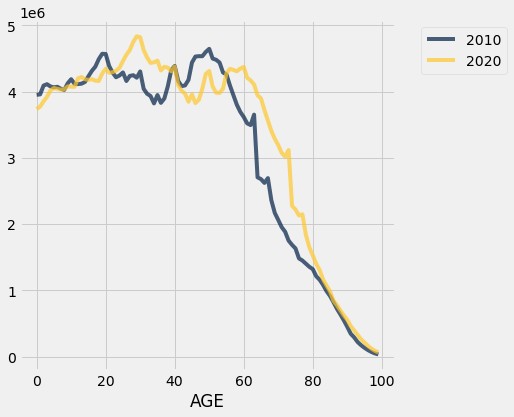

In [18]:
us_pop.where('GENDER',0).select('AGE','2010','2020').where('AGE',are.below(100)).plot('AGE')